<a href="https://colab.research.google.com/github/Wikanes-k/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

###Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

###Explore data

In [3]:
X.shape

(500, 2)

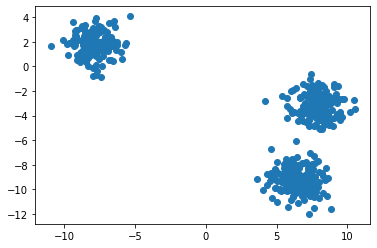

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

###Clustering

####Import

In [5]:
from sklearn.cluster import KMeans

####Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

####Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

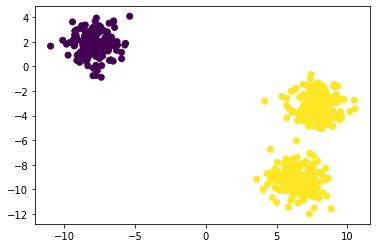

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

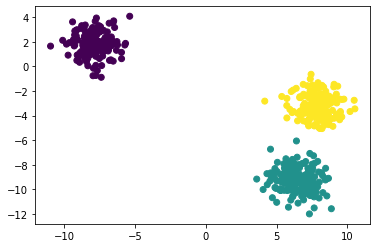

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

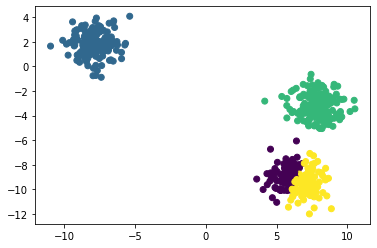

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

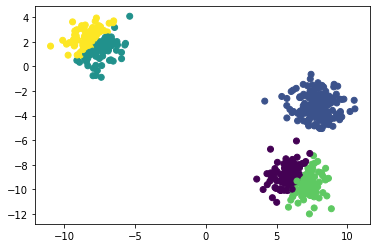

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

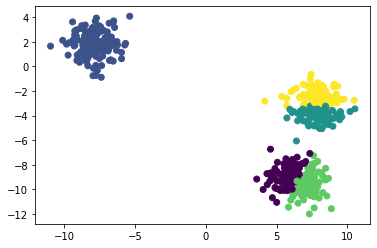

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

##Example Application (Color Quantization)

In [14]:
import cv2
import os

In [16]:
img = cv2.imread('/content/image1.jpg')

In [17]:
img.shape

(1600, 1600, 3)

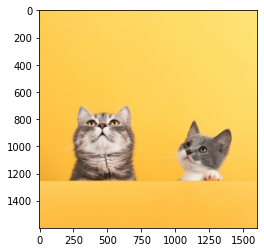

In [18]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###นับจำนวนสี

In [19]:
3import numpy as np

In [20]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(57219, 3)

###จัดกลุ่มสีให้เหลือ 16 สี

In [21]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [22]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(2560000, 3)

In [23]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนของสี

In [24]:
centroid = myquantize.cluster_centers_

In [25]:
centroid

array([[254.21850525, 206.28691397,  85.21587256],
       [103.98776179,  85.12506061,  73.01766458],
       [218.22313179, 200.20248378, 187.9722831 ],
       [254.55918721, 213.40689901,  94.46701944],
       [254.01612085, 199.30626161,  76.75852602],
       [200.56055348, 176.98618526, 160.77974284],
       [235.32349522, 223.28080374, 215.89526876],
       [150.05351197, 128.28751301, 114.94297607],
       [253.9890324 , 190.92438019,  66.91064765],
       [ 47.96054526,  33.687626  ,  23.48382452],
       [254.28962416, 221.02736178, 107.19038988],
       [126.59045471, 105.8891764 ,  92.79416578],
       [196.18260388, 145.85783934,  78.25019391],
       [ 80.73754701,  62.95163951,  51.23391832],
       [244.40616996, 180.13740735,  57.39902985],
       [175.93360636, 152.66222992, 138.67651151]])

แทนสีคืนลงไป

In [26]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

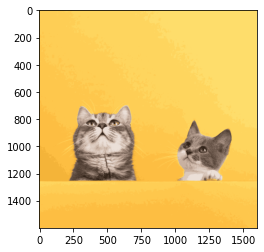

In [27]:
plt.imshow(new_img/255)

In [28]:
plt.imsave('img.jpg',new_img/255)

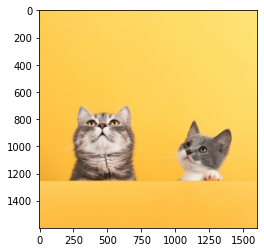

In [29]:
plt.imshow(RGB_img)

##Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

##Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation